In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling as pp


color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [251]:
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [253]:
##df = df.drop_duplicates()

In [254]:
cor = df.corr()
cor_target = abs(cor["Absenteeism time in hours"]) # absolute value of the correlation 
print(cor_target.sort_values())
print("===")
print("corr mean = {}".format(cor_target.mean()))
print("===")
relevant_features = cor_target[cor_target>0.1] # highly correlated features 
names = [index for index, value in relevant_features.iteritems()] # getting the names of the features 
names.remove('Absenteeism time in hours') # removing target feature 
print(names) # printing the features 

Seasons                            0.005615
Social smoker                      0.008936
Weight                             0.015789
ID                                 0.017997
Service time                       0.019029
Month of absence                   0.024345
Work load Average/day              0.024749
Hit target                         0.026695
Transportation expense             0.027585
Pet                                0.028277
Education                          0.046235
Body mass index                    0.049719
Social drinker                     0.065067
Age                                0.065760
Distance from Residence to Work    0.088363
Son                                0.113756
Disciplinary failure               0.124248
Day of the week                    0.124361
Height                             0.144420
Reason for absence                 0.173116
Absenteeism time in hours          1.000000
Name: Absenteeism time in hours, dtype: float64
===
corr mean = 0.1044791750

In [255]:
##We will drop any feature that has correlation with (Absenteeism time in hours) bellow ID, because if the ID is uselss
##the id is useless NO need to keep features that have correlation bellow ID.

In [256]:
df2 = df.drop(['ID'], axis = 1)

In [257]:
df2 = df2.drop(['Seasons'], axis = 1)

In [258]:
df2 = df2.drop(['Weight'], axis = 1)

In [259]:
df2 = df2.drop(['Month of absence'], axis = 1)

In [260]:
df2 = df2.drop(['Social smoker'], axis = 1)

In [261]:
df2 = df2.drop(['Transportation expense'], axis = 1)

In [262]:
df2 = df2.loc[:, ~df2.columns.str.startswith('Work load Average')]

In [263]:
df2 = df2.drop(['Service time'], axis = 1)

In [264]:
df2 = df2.drop(['Hit target'], axis = 1)

In [265]:
df2 = df2.drop(['Pet'], axis = 1)

In [266]:
df2 = df2.drop(['Education'], axis = 1)

In [267]:
df2 = df2.drop(['Body mass index'], axis = 1)

In [268]:
df2 = df2.drop(['Social drinker'], axis = 1)

In [269]:
df2 = df2.drop(['Age'], axis = 1)

In [270]:
df2 = df2.drop(['Distance from Residence to Work'], axis = 1)

In [271]:
x = df2.drop(["Absenteeism time in hours"],axis = 1)
y = df2["Absenteeism time in hours"]

In [272]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [273]:
#Absenteeism time in hours

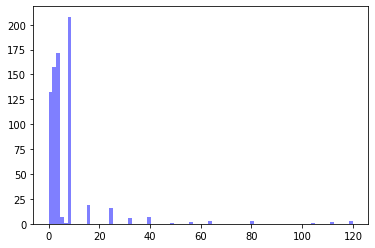

In [274]:
x = df2["Absenteeism time in hours"]
num_bins = 80
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [275]:
from sklearn.cluster import KMeans
import numpy as np
x = df2["Absenteeism time in hours"]

km = KMeans(n_clusters=2, random_state=0)
km.fit(x.values.reshape(-1,1))

km.cluster_centers_

array([[ 5.30206897],
       [85.33333333]])

In [276]:
def classifier(row):
    if row["Absenteeism time in hours"] == 0:
          return 0 ##low 
    if row["Absenteeism time in hours"] > 0 and row["Absenteeism time in hours"] <= 5:
          return 1 ##moderate 
    else:
        return -1 ##EXTREME
     
df2["Abs"] = df2.apply(classifier, axis=1)
df2 = df2.drop(["Absenteeism time in hours"], axis = 1)

In [277]:
#Height

In [278]:
from sklearn.cluster import KMeans
import numpy as np
x = df2["Height"]

km = KMeans(n_clusters=3, random_state=0)
km.fit(x.values.reshape(-1,1))

km.cluster_centers_

array([[169.95153473],
       [196.        ],
       [179.14130435]])

In [279]:
def classifier3(row):
    if  row["Height"] > 0 and row["Height"] < 180:
        return 1 ##average
    else:
        return 0 ##tall
     
df2["height"] = df2.apply(classifier3, axis=1)
df2 = df2.drop(["Height"], axis = 1)

In [280]:
#Month of absence

In [281]:
# def classifier4(row):
#     if  row["Month of absence"] > 3 and row["Month of absence"] < 3:
#         return 0 ##average
#     elif row["Month of absence"] > 6 and row["Month of absence"] < 9:
#         return 1
#     elif row["Month of absence"] > 9 and row["Month of absence"] < 12:
#         return 2
#     else:
#         return 3 
     
# df2["my_month"] = df2.apply(classifier4, axis=1)
# df2 = df2.drop(["Month of absence"], axis = 1)

In [282]:
#Transportation expense

In [283]:
# from sklearn.cluster import KMeans
# import numpy as np
# x = df2["Transportation expense"]

# km = KMeans(n_clusters=3, random_state=0)
# km.fit(x.values.reshape(-1,1))

# km.cluster_centers_

In [284]:
# def classifier5(row):
#     if  row["Transportation expense"] < 160:
#         return 1 ##average
#     elif row["Transportation expense"] > 160 and row["Transportation expense"] < 253:
#         return 2
#     else:
#         return 3 
     
# df2["my_transport"] = df2.apply(classifier5, axis=1)
# df2 = df2.drop(["Transportation expense"], axis = 1)

In [285]:
##pp.ProfileReport(df2, title="Pandas Profiling Report")

In [286]:
cor = df2.corr()
cor_target = abs(cor["Abs"]) # absolute value of the correlation 
print(cor_target.sort_values())

relevant_features = cor_target[cor_target>0.1] # highly correlated features 
names = [index for index, value in relevant_features.iteritems()] # getting the names of the features 

Disciplinary failure    0.051805
height                  0.078182
Day of the week         0.138430
Son                     0.175177
Reason for absence      0.416532
Abs                     1.000000
Name: Abs, dtype: float64


In [287]:
df2 = df2.drop(['Disciplinary failure'], axis = 1)

In [288]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

X = df2.drop('Abs', axis=1)
y = df2["Abs"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [289]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)
evaluate(lr_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[109   1 109]
 [ 15  18   1]
 [ 44   0 295]]
ACCURACY SCORE:
0.7128
CLASSIFICATION REPORT:
                   -1          0           1  accuracy   macro avg  \
precision    0.648810   0.947368    0.728395  0.712838    0.774858   
recall       0.497717   0.529412    0.870206  0.712838    0.632445   
f1-score     0.563307   0.679245    0.793011  0.712838    0.678521   
support    219.000000  34.000000  339.000000  0.712838  592.000000   

           weighted avg  
precision      0.711530  
recall         0.712838  
f1-score       0.701502  
support      592.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[28  0 25]
 [ 6  4  0]
 [13  0 72]]
ACCURACY SCORE:
0.7027
CLASSIFICATION REPORT:
                  -1          0          1  accuracy   macro avg  weighted avg
precision   0.595745   1.000000   0.742268  0.702703    0.779338      0.707211
recall      0.528302   0.400000   0.847059  0.702703    0.591787      0.702703
f1-score    0.560000   0.571429   0

In [290]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[198   0  21]
 [  0  33   1]
 [ 22   0 317]]
ACCURACY SCORE:
0.9257
CLASSIFICATION REPORT:
                  -1          0           1  accuracy   macro avg  \
precision    0.90000   1.000000    0.935103  0.925676    0.945034   
recall       0.90411   0.970588    0.935103  0.925676    0.936600   
f1-score     0.90205   0.985075    0.935103  0.925676    0.940743   
support    219.00000  34.000000  339.000000  0.925676  592.000000   

           weighted avg  
precision      0.925845  
recall         0.925676  
f1-score       0.925746  
support      592.000000  
TESTING RESULTS: 
CONFUSION MATRIX:
[[38  0 15]
 [ 0 10  0]
 [18  0 67]]
ACCURACY SCORE:
0.7770
CLASSIFICATION REPORT:
                  -1     0          1  accuracy   macro avg  weighted avg
precision   0.678571   1.0   0.817073  0.777027    0.831882      0.779834
recall      0.716981   1.0   0.788235  0.777027    0.835072      0.777027
f1-score    0.697248   1.0   0.802395  0.777027    0.83

In [291]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


print("\n=========RANDOM FOREST============")
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ['gini', 'entropy']

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

evaluate(rf_clf, X_train, X_test, y_train, y_test)


=========RANDOM FOREST============
Fitting 3 folds for each of 720 candidates, totalling 2160 fits


c:\users\el_ghizi_yassine\pycharmprojects\test\venv\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan n

Best parameters: {'bootstrap': True, 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
TRAINIG RESULTS: 
CONFUSION MATRIX:
[[178   0  41]
 [ 33   0   1]
 [ 67   0 272]]
ACCURACY SCORE:
0.7601
CLASSIFICATION REPORT:
                   -1     0           1  accuracy   macro avg  weighted avg
precision    0.640288   0.0    0.866242  0.760135    0.502177      0.732904
recall       0.812785   0.0    0.802360  0.760135    0.538382      0.760135
f1-score     0.716298   0.0    0.833078  0.760135    0.516459      0.742032
support    219.000000  34.0  339.000000  0.760135  592.000000    592.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[40  0 13]
 [10  0  0]
 [15  0 70]]
ACCURACY SCORE:
0.7432
CLASSIFICATION REPORT:
                  -1     0          1  accuracy   macro avg  weighted avg
precision   0.615385   0.0   0.843373  0.743243    0.486253      0.704744
recall      0.754717   0.0   0.823529  0.743243    0.526082      0.743243
f1-sco

c:\users\el_ghizi_yassine\pycharmprojects\test\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\users\el_ghizi_yassine\pycharmprojects\test\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\users\el_ghizi_yassine\pycharmprojects\test\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\users\el_ghizi_yassine\pycharmprojects\test\venv\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning